# Live


### caliberate

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

In [3]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [4]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane


#objpoints = list(np.load("objpoints.npy"))
#imgpoints = list(np.load("imgpoints.npy"))
#objpoints = objpoints[:1000:30]
#objpoints = imgpoints[:1000:30]

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER  , 30, 0.001)

In [6]:
os.listdir("C:/Users/shrin/Pictures/Camera Roll/img")

['WIN_20191114_15_38_44_Pro.jpg',
 'WIN_20191114_15_39_39_Pro.jpg',
 'WIN_20191114_15_39_53_Pro.jpg',
 'WIN_20191114_15_40_01_Pro.jpg',
 'WIN_20191114_15_40_05_Pro.jpg',
 'WIN_20191114_15_40_15_Pro.jpg',
 'WIN_20191114_15_40_21_Pro.jpg',
 'WIN_20191115_15_41_57_Pro.jpg',
 'WIN_20191115_15_42_01_Pro.jpg',
 'WIN_20191115_15_42_07_Pro.jpg',
 'WIN_20191115_15_42_11_Pro.jpg',
 'WIN_20191115_15_42_15_Pro.jpg',
 'WIN_20191115_15_42_22_Pro.jpg',
 'WIN_20191115_15_42_29_Pro.jpg',
 'WIN_20191115_15_42_38_Pro.jpg',
 'WIN_20191115_15_42_42_Pro.jpg',
 'WIN_20191115_15_47_34_Pro.jpg',
 'WIN_20191115_15_47_39_Pro.jpg',
 'WIN_20191115_15_47_42_Pro.jpg',
 'WIN_20191115_15_47_50_Pro.jpg',
 'WIN_20191115_15_48_07_Pro.jpg',
 'WIN_20191115_15_48_13_Pro.jpg']

In [7]:
pathTtoimg = "C:/Users/shrin/Pictures/Camera Roll/img/"
imgs = os.listdir("C:/Users/shrin/Pictures/Camera Roll/img")

for frm in imgs:
    frame = cv2.imread(pathTtoimg+frm)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _,thresh = cv2.threshold(gray,50,250,cv2.THRESH_BINARY)
    ret, corners = cv2.findChessboardCorners(thresh, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(thresh,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(frame, (9,6), corners2,ret)
        
        # calibrate cam
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
        

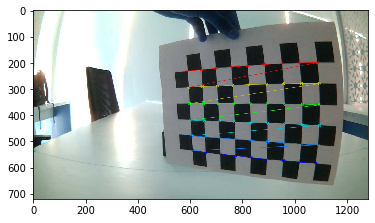

In [8]:
plt.imshow(frame)

In [9]:
frame = cv2.imread(pathTtoimg+imgs[3])
#frame = cv2.imread("C:/Users/shrin/Documents/Abhilash/PICT0227.jpg")
def cal_undistort(img, objpoints, imgpoints):
    re t, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
undistorted = cal_undistort(frame, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(frame)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('undistorted',fontsize = 50)

SyntaxError: invalid syntax (<ipython-input-9-545669845eaa>, line 4)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

In [ ]:
cap = cv2.VideoCapture(1)

while(True):
    ret, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    undistorted = cal_undistort(frame, objpoints, imgpoints)
    cv2.imshow('frame',frame)
    cv2.imshow("undistorted",undistorted)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
objpoints

In [ ]:
len(imgpoints[0])

In [ ]:
cv2.calibrationMatrixValues(mtx,(undistorted.shape[0],undistorted.shape[1]),2.6,2.5)

# A4 measure

In [10]:
# WIN_20191115_17_35_59_Pro.jpg
jkbond = cv2.imread("C:/Users/shrin/Pictures/Camera Roll/WIN_20191115_17_35_59_Pro.jpg")

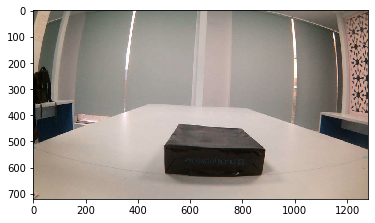

In [11]:
plt.imshow(jkbond)

Text(0.5, 1, 'undistorted')

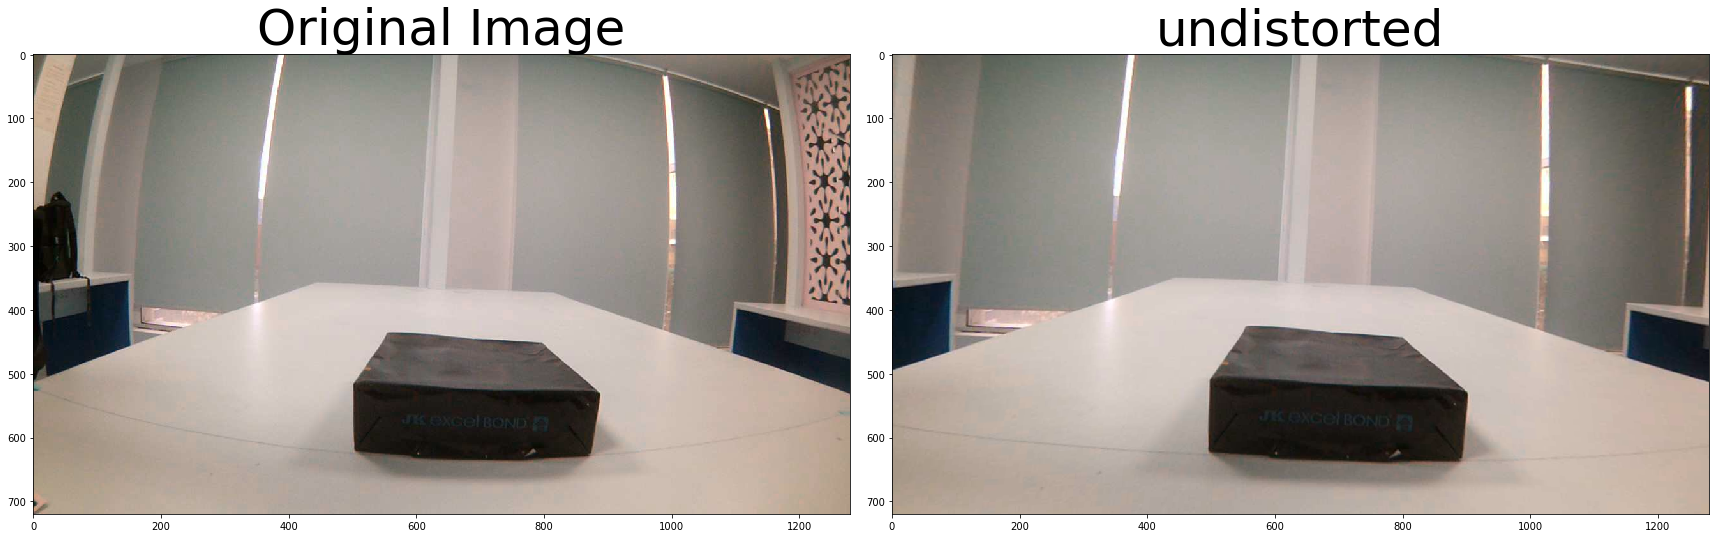

In [12]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist
undistorted = cal_undistort(jkbond, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(jkbond)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('undistorted',fontsize = 50)

In [13]:
print("shape of original image      =", jkbond.shape, "\nshape of undistorted image   =", undistorted.shape)

shape of original image      = (720, 1280, 3) 
shape of undistorted image   = (720, 1280, 3)


In [14]:
undistortedGray = cv2.cvtColor(undistorted,cv2.COLOR_BGR2GRAY)

In [15]:
#%matplotlib notebook

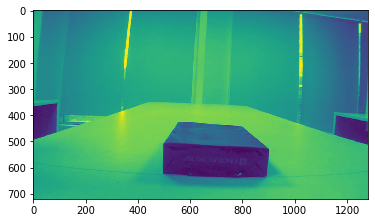

In [16]:
plt.imshow(undistortedGray)

In [17]:
# x,y
tl = [555,425]
tr = [800,442]
ml = [497,507]
mr = [900,528]
bl = [496,622]
br = [892,634]
allPoints = [tl, tr, ml, mr, bl, br]

In [18]:
for i in allPoints:
    img = cv2.circle(undistorted, tuple(i), 5, 0, 5)

In [19]:
middlex = ((tl[0]+tr[0])/2) 
middley = ((tl[1]+tr[1])/2) 

In [20]:
print(middlex,middley)
img = cv2.circle(undistorted, (int(middlex),int(middley)), 5, 0, 5)

677.5 433.5


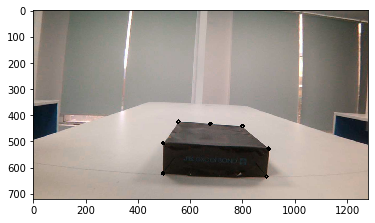

In [21]:
plt.imshow(undistorted)

In [22]:
_,undistortedThreh = cv2.threshold(undistortedGray,90,250,cv2.THRESH_BINARY)
gauss = cv2.adaptiveThreshold(undistortedGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,25)

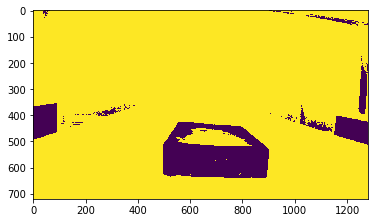

In [23]:
plt.imshow(gauss)

In [24]:
_ , contours, hierarchy =   cv2.findContours(gauss.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)

In [25]:
blank = np.zeros((gauss.shape))

blank = cv2.drawContours(blank,cnts,1,(255,255,0),3)

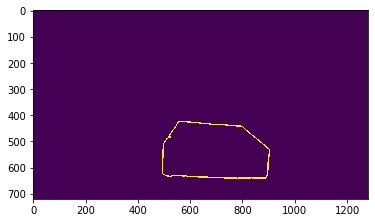

In [26]:
plt.imshow(blank)

In [27]:
import math
myradians = math.atan2(middley-mr[1], middlex-mr[0])
print(myradians)

-2.7399599540818373


In [28]:
print ("atan2(-0.50,-0.50) : ",   math.degrees(math.atan2(5,5)))
print ("atan2(0.50,0.50) : ",   math.degrees(math.atan2(0.50,0.50)))
print ("atan2(5,5) : ",   math.degrees(math.atan2(5,5)))
print ("atan2(-10,10) : ",   math.degrees(math.atan2(-10,10)))
print ("atan2(10,20) : ",   math.degrees(math.atan2(10,20)))

atan2(-0.50,-0.50) :  45.0
atan2(0.50,0.50) :  45.0
atan2(5,5) :  45.0
atan2(-10,10) :  -45.0
atan2(10,20) :  26.56505117707799


In [29]:
mydegrees = math.degrees(myradians)
print(mydegrees)

-156.98814140374813


In [30]:
180+mydegrees

23.01185859625187

In [31]:
import math
myradians = math.atan2(middley-ml[1], middlex-ml[0])
print(myradians)

-0.38669972336466496


In [32]:
mydegrees = math.degrees(myradians)
print(mydegrees)

-22.156262087671774


In [33]:
from skimage.transform import (hough_line, hough_line_peaks)

In [34]:
hspace, angles, distances = hough_line(blank)

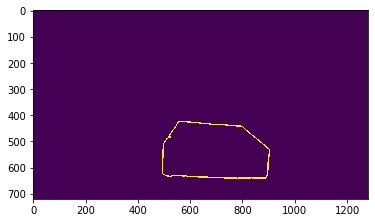

In [35]:
plt.imshow(blank)

In [36]:
angles

array([-1.57079633, -1.55324553, -1.53569473, -1.51814394, -1.50059314,
       -1.48304234, -1.46549155, -1.44794075, -1.43038995, -1.41283915,
       -1.39528836, -1.37773756, -1.36018676, -1.34263597, -1.32508517,
       -1.30753437, -1.28998358, -1.27243278, -1.25488198, -1.23733118,
       -1.21978039, -1.20222959, -1.18467879, -1.167128  , -1.1495772 ,
       -1.1320264 , -1.11447561, -1.09692481, -1.07937401, -1.06182322,
       -1.04427242, -1.02672162, -1.00917082, -0.99162003, -0.97406923,
       -0.95651843, -0.93896764, -0.92141684, -0.90386604, -0.88631525,
       -0.86876445, -0.85121365, -0.83366286, -0.81611206, -0.79856126,
       -0.78101046, -0.76345967, -0.74590887, -0.72835807, -0.71080728,
       -0.69325648, -0.67570568, -0.65815489, -0.64060409, -0.62305329,
       -0.60550249, -0.5879517 , -0.5704009 , -0.5528501 , -0.53529931,
       -0.51774851, -0.50019771, -0.48264692, -0.46509612, -0.44754532,
       -0.42999453, -0.41244373, -0.39489293, -0.37734213, -0.35

In [37]:
# Obtain angle for each line
angles = [a*180/np.pi for a in angles]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(angle_difference)

180.0


In [38]:
l1 = [ml,mr]
l2 = [ml, (middlex,middley)]
m1 = (l1[1][1]-l1[0][1])/(l1[1][0]-l1[0][0])
m2 = (l2[1][1]-l2[0][1])/(l2[1][0]-l2[0][0])

angle_rad = abs(math.atan(m1) - math.atan(m2))

In [39]:
math.degrees(angle_rad)

25.139200269464094

In [40]:
l1 = [mr,ml]
l2 = [mr, (middlex,middley)]
m1 = (l1[1][1]-l1[0][1])/(l1[1][0]-l1[0][0])
m2 = (l2[1][1]-l2[0][1])/(l2[1][0]-l2[0][0])

angle_rad = abs(math.atan(m1) - math.atan(m2))

In [41]:
math.degrees(angle_rad)

20.028920414459567

In [42]:
x = 90- 25.139200269464094
b = 90- 20.028920414459567

In [43]:
c = 21.2*10

In [44]:
(c*math.sin(x)*math.sin(b))/ math.sin(180-(x-b))

595.160755515221

# Prespective transform

In [45]:
pts1 = np.float32([tl,tr,ml,mr])
pts2 = np.float32([[0,0],[mr[0]-ml[0],0],[0,ml[1]-tl[1]],[mr[0]-ml[0],ml[1]-tl[1]]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(mr[0]-ml[0],ml[1]-tl[1]))

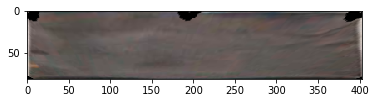

In [46]:
plt.imshow(dst)

In [47]:
print(dst.shape[0]/2)
print(dst.shape[1]/2)

41.0
201.5


In [48]:
ml[1]-tl[1]

82

In [49]:
myradians = math.atan(41)
print(myradians)
mydegrees = math.degrees(myradians)
print(mydegrees)

1.546410917622178
88.60281897270363


In [50]:
x = 90 - 11.529035725354277
b = 90 - 

SyntaxError: invalid syntax (<ipython-input-50-9e11bd789198>, line 2)

# Measure w.r.t triangulation 

In [ ]:
# 1st

In [ ]:
blank = np.zeros((gauss.shape[:2]))

blank = cv2.line(blank,(ml[0],ml[1]),(int(middlex),int(middley)),255,5)
blank = cv2.line(blank,(ml[0],ml[1]),(int(mr[0]),int(mr[1])),255,5)
_,blankThresh = cv2.threshold(blank,50,250,cv2.THRESH_BINARY)
plt.imshow(blankThresh)

In [ ]:
image = np.mean(blankThresh)
print(image)

In [ ]:
hspace, angles, distances = hough_line(blankThresh)

# Find angle
angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):
    angle.append(a)

# Obtain angle for each line
angles = [a*180/np.pi for a in angle]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(angle_difference)

In [ ]:
# 2nd

In [ ]:
blank1 = np.zeros((gauss.shape[:2]))

blank1 = cv2.line(blank1,(mr[0],mr[1]),(int(middlex),int(middley)),255,5)
blank1 = cv2.line(blank1,(mr[0],mr[1]),(int(ml[0]),int(ml[1])),255,5)
_,blankThresh1 = cv2.threshold(blank1,50,250,cv2.THRESH_BINARY)
plt.imshow(blankThresh1)

In [ ]:
hspace, angles, distances = hough_line(blankThresh1)

# Find angle
angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):
    angle.append(a)

# Obtain angle for each line
angles = [a*180/np.pi for a in angle]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(angle_difference)

In [ ]:
x = 3.0167597765363325
b = 24.134078212290476
#x = 180 - 25
#b = 180 - 20

In [ ]:
(c*math.sin(x)*math.sin(b))/ math.sin(180-(x-b))

In [ ]:
plt.imshow(blankThresh+blankThresh1)

In [ ]:
plt.imshow(img)

In [ ]:
import math
 
def angle3pt(a, b, c):
    """Counterclockwise angle in degrees by turning from a to c around b
        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    #print(ang,"angle")
    return ang + 360 if ang < 0 else ang
 
#print(angle3pt((ml[0],ml[1]), (mr[0], mr[1]), (middlex, middley)))

In [ ]:
x = angle3pt((middlex, middley), (ml), (mr))
b = 360 - angle3pt((middlex, middley), (mr), (ml))
print("angle alpha = ", x,"*", "\nangle beta  = ", b,"*")

In [ ]:
(210* math.degrees(math.sin(x)*math.sin(b)))/ math.degrees(math.sin(180-(x-b)))

# thickness 

In [ ]:
blank = np.zeros((gauss.shape[:2]))

blank = cv2.line(blank,(ml[0],ml[1]),(int(middlex),int(middley)),255,5)
blank = cv2.line(blank,(ml[0],ml[1]),(int(mr[0]),int(mr[1])),255,5)
_,blankThresh = cv2.threshold(blank,50,250,cv2.THRESH_BINARY)
plt.imshow(blankThresh)

In [ ]:
middlex = ((ml[0]+mr[0])/2) 
middley = ((ml[1]+mr[1])/2) 

In [ ]:
print(middlex,middley)
img = cv2.circle(undistorted, (int(middlex),int(middley)), 5, 0, 5)

In [ ]:
plt.imshow(undistorted)

In [ ]:
blank = np.zeros((gauss.shape[:2]))

blank = cv2.line(blank,(bl[0],bl[1]),(int(middlex),int(middley)),255,5)
blank = cv2.line(blank,(bl[0],bl[1]),(int(br[0]),int(br[1])),255,5)
_,blankThresh = cv2.threshold(blank,50,250,cv2.THRESH_BINARY)
plt.imshow(blankThresh)

In [ ]:
hspace, angles, distances = hough_line(blankThresh)

# Find angle
angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):
    angle.append(a)

# Obtain angle for each line
angles = [a*180/np.pi for a in angle]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(angle_difference)

In [ ]:
# 2nd

In [ ]:
blank1 = np.zeros((gauss.shape[:2]))

blank1 = cv2.line(blank1,(br[0],br[1]),(int(middlex),int(middley)),255,5)
blank1 = cv2.line(blank1,(br[0],br[1]),(int(bl[0]),int(bl[1])),255,5)
_,blankThresh1 = cv2.threshold(blank1,50,250,cv2.THRESH_BINARY)
plt.imshow(blankThresh1)

In [ ]:
hspace, angles, distances = hough_line(blankThresh1)

# Find angle
angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):
    angle.append(a)

# Obtain angle for each line
angles = [a*180/np.pi for a in angle]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(angle_difference)

In [ ]:
x = 178.9944134078212
b = 178.9944134078212

In [ ]:
(c*math.sin(x)*math.sin(b))/ math.sin(180-(x-b))

In [ ]:
plt.imshow(blankThresh+blankThresh1)

## IEEE

In [ ]:
h = 170

In [ ]:
thickness = h * ((bl[1]-ml[1])/bl[1])

In [ ]:
thickness

In [ ]:
width = h * ((mr[0]-ml[0])/mr[0])
width

#### Real_obj_dst = (dst * objct_height_in_PIX * sensor_height_MM) / ( FL_in_MM * img_height_PIX)

In [ ]:
Real_obj_dst = ( 440 * (mr[0]-ml[0]) * 3.6) / (3.2 * blankThresh.shape[1])

In [ ]:
Real_obj_dst

In [ ]:
Real_obj_dst = ( 440 * (bl[1]-ml[1]) * 3.6) / (3.2 * blankThresh.shape[0])

In [ ]:
Real_obj_dst

In [1]:
from matting import alpha_matting, load_image, save_image, estimate_foreground_background, stack_images

ModuleNotFoundError: No module named 'matting'